In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import utils as ut
import importlib

In [19]:
importlib.reload(ut)

<module 'utils' from 'c:\\Users\\David\\OneDrive - Universidad del rosario\\Educacion\\Cursos\\Henry_Programacion\\Road-Accidents-DA\\utils.py'>

# Homicidios Dataset

Normalizing descriptive metadata and dataset in order to work with a proper data format and descriptions.

## Metadata Transformation

Reading the Metadata Sheet

In [6]:
df_md = pd.read_excel('data/homicidios.xlsx', sheet_name='DICCIONARIO_HECHOS')
df_md

,variables y definiciones,descripción
0,ID,identificador unico del siniestro
1,N_VICTIMAS,cantidad de víctimas
2,FECHA,fecha en formato dd/mm/aaaa
3,AAAA,año
4,MM,mes
5,DD,día del mes
6,HORA,hora del siniestro
7,HH,franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. En el caso de intersecciones ...


Capitalizing every string in the 'descripción' column

In [7]:
df_md['descripción'] = df_md['descripción'].str.capitalize()
df_md

,variables y definiciones,descripción
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Renaming columns

In [8]:
df_md.rename(columns={'variables y definiciones': 'Variable', 'descripción': 'Descripcion'}, inplace=True)
df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Capitalizing every letter of the variable column

In [9]:
df_md['Variable'] = df_md['Variable'].str.upper()
df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Replacing spaces from 'Variable' values with underscore

In [10]:
df_md['Variable'] = df_md['Variable'].str.replace(' ', '_')
df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR_DEL_HECHO,Dirección del hecho
9,TIPO_DE_CALLE,Tipo de arteria. en el caso de intersecciones ...


Renaming self-explanatory variables

In [11]:
df_md.at[8, 'Variable'] = 'LUGAR'
df_md.at[9, 'Variable'] = 'TIPO_CALLE'
df_md.at[13, 'Variable'] = 'DIRECCION'

df_md

,Variable,Descripcion
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR,Dirección del hecho
9,TIPO_CALLE,Tipo de arteria. en el caso de intersecciones ...


The df was exported to Excel for other minor changes

In [ ]:
df_md.to_excel('data/metadata/metadata_h.xlsx')

In [14]:
df_md = pd.read_excel('data/metadata/metadata_h.xlsx', sheet_name='Sheet1')

In [15]:
df_md

,VARIABLE,DESCRIPCION
0,ID,Identificador unico del siniestro
1,N_VICTIMAS,Cantidad de víctimas
2,FECHA,Fecha en formato dd/mm/aaaa
3,AAAA,Año
4,MM,Mes
5,DD,Día del mes
6,HORA,Hora del siniestro
7,HH,Franja horaria entera
8,LUGAR,Dirección del hecho
9,TIPO_CALLE,Tipo de arteria. Para intersecciones se clasif...


Reviewing dataset data types and replacing inproper datatypes

In [12]:
path = 'data/homicidios.xlsx'

df_hc = pd.read_excel(path, sheet_name='HECHOS')

In [13]:
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,"[<class 'str'>, <class 'datetime.datetime'>]",100.0,696,0.0,0
7,HH,"[<class 'int'>, <class 'str'>]",100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


In [20]:
df_hc['FECHA'] = df_hc['FECHA'].astype(str)
df_hc['HORA'] = df_hc['HORA'].astype(str)
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'str'>],100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,[<class 'str'>],100.0,696,0.0,0
7,HH,"[<class 'int'>, <class 'str'>]",100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


Editing inproper data types due to 'SD' tag setted for null values

In [21]:
df_info = ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


In [22]:
df_info.at[7, 'dType'] = '[<class \'int\'>]'
df_info.at[11, 'dType'] = '[<class \'int\'>]'
df_info

,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'str'>],100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,[<class 'str'>],100.0,696,0.0,0
7,HH,[<class 'int'>],100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


Adding dType column to metadata info

In [23]:
path = 'data/metadata/metadata_h.xlsx'
df_md = pd.read_excel(path)

df_md['DTYPE'] = df_info['dType'].values
df_md

,VARIABLE,DESCRIPCION,DTYPE
0,ID,Identificador unico del siniestro,[<class 'str'>]
1,N_VICTIMAS,Cantidad de víctimas,[<class 'int'>]
2,FECHA,Fecha en formato dd/mm/aaaa,[<class 'str'>]
3,AAAA,Año,[<class 'int'>]
4,MM,Mes,[<class 'int'>]
5,DD,Día del mes,[<class 'int'>]
6,HORA,Hora del siniestro,[<class 'str'>]
7,HH,Franja horaria entera,[<class 'int'>]
8,LUGAR,Dirección del hecho,[<class 'str'>]
9,TIPO_CALLE,Tipo de arteria. Para intersecciones se clasif...,[<class 'str'>]


Exporting the final Metadata

In [24]:
df_md.to_excel('data/metadata/metadata_h.xlsx', index=False)

## Data Transformation

Minor data transformations for data normalization

Opening xlsx sheet

In [16]:
path = 'data/homicidios.xlsx'

df_hc = pd.read_excel(path, sheet_name='HECHOS')

In [17]:
df_hc.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Renaming columns with normalized titles

In [19]:
df_hc.columns = df_md['VARIABLE'].values
df_hc.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR,TIPO_CALLE,...,ALTURA,CRUCE,DIRECCION,COMUNA,XY_(CABA),POS_X,POS_Y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


Null and duplicated values preview

In [20]:
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.00,696,0.00,0
1,N_VICTIMAS,[<class 'int'>],100.00,696,0.00,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,696,0.00,0
3,AAAA,[<class 'int'>],100.00,696,0.00,0
4,MM,[<class 'int'>],100.00,696,0.00,0
5,DD,[<class 'int'>],100.00,696,0.00,0
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.00,696,0.00,0
7,HH,"[<class 'int'>, <class 'str'>]",100.00,696,0.00,0
8,LUGAR,[<class 'str'>],100.00,696,0.00,0
9,TIPO_CALLE,[<class 'str'>],100.00,696,0.00,0


Null values were filled with the 'SD' tag

In [21]:
df_hc = df_hc.fillna('SD')
ut.data_review(df_hc)


Total rows:  696

Total full null rows:  0

Total duplicated rows: 0


,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,ID,[<class 'str'>],100.0,696,0.0,0
1,N_VICTIMAS,[<class 'int'>],100.0,696,0.0,0
2,FECHA,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.0,696,0.0,0
3,AAAA,[<class 'int'>],100.0,696,0.0,0
4,MM,[<class 'int'>],100.0,696,0.0,0
5,DD,[<class 'int'>],100.0,696,0.0,0
6,HORA,"[<class 'datetime.time'>, <class 'str'>, <clas...",100.0,696,0.0,0
7,HH,"[<class 'int'>, <class 'str'>]",100.0,696,0.0,0
8,LUGAR,[<class 'str'>],100.0,696,0.0,0
9,TIPO_CALLE,[<class 'str'>],100.0,696,0.0,0


Exporting the final dataset to Excel

In [23]:
df_hc.to_excel('hom_data.xlsx', sheet_name='HECHOS', index=False)

## Homicidios EDA

Exploring every data dimension in order to understand data and find meaningful insights

### Data Dictionary

In [33]:
path = 'data/metadata/metadata_h.xlsx'
df_md = pd.read_excel(path)

df_md

,VARIABLE,DESCRIPCION,DTYPE
0,ID,Identificador unico del siniestro,[<class 'str'>]
1,N_VICTIMAS,Cantidad de víctimas,[<class 'int'>]
2,FECHA,Fecha en formato dd/mm/aaaa,[<class 'str'>]
3,AAAA,Año,[<class 'int'>]
4,MM,Mes,[<class 'int'>]
5,DD,Día del mes,[<class 'int'>]
6,HORA,Hora del siniestro,[<class 'str'>]
7,HH,Franja horaria entera,[<class 'int'>]
8,LUGAR,Dirección del hecho,[<class 'str'>]
9,TIPO_CALLE,Tipo de arteria. Para intersecciones se clasif...,[<class 'str'>]


### INT Variables

Reading the dataset

In [34]:
path = 'data/homicidios.xlsx'
df_hc = pd.read_excel(path, sheet_name='HECHOS')

Filtering the metadata for listing the int dtype variables

In [38]:
int_vars = df_md[df_md['DTYPE'] == '[<class \'int\'>]']
int_vars

,VARIABLE,DESCRIPCION,DTYPE
1,N_VICTIMAS,Cantidad de víctimas,[<class 'int'>]
3,AAAA,Año,[<class 'int'>]
4,MM,Mes,[<class 'int'>]
5,DD,Día del mes,[<class 'int'>]
7,HH,Franja horaria entera,[<class 'int'>]
11,ALTURA,Altura de la arteria donde se produjo el hecho,[<class 'int'>]
14,COMUNA,Comuna de la ciudad (1 a 15),[<class 'int'>]


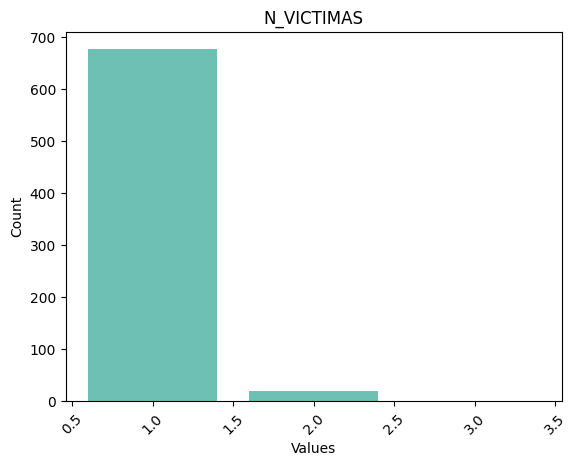

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64


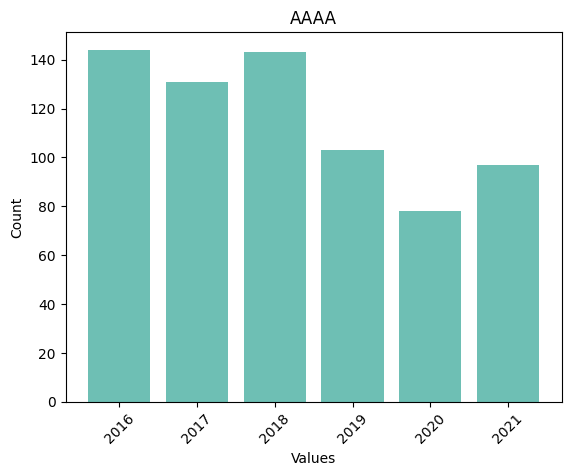

AAAA
2016    144
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64


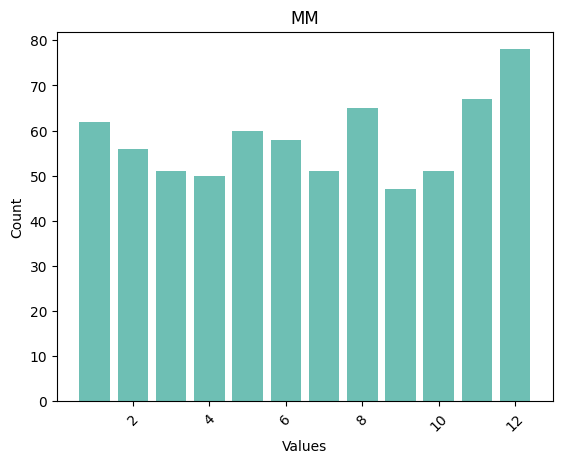

MM
12    78
11    67
8     65
1     62
5     60
6     58
2     56
3     51
7     51
10    51
4     50
9     47
Name: count, dtype: int64


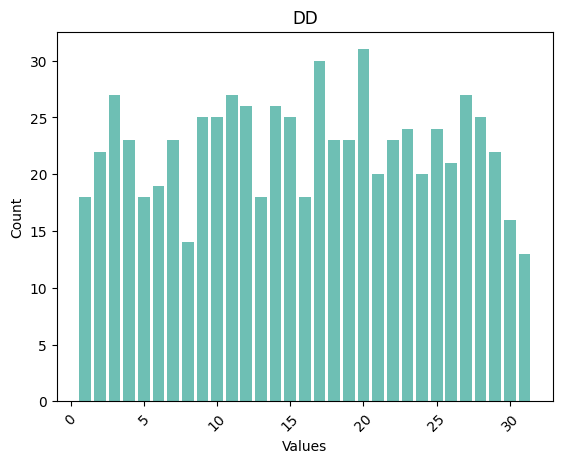

DD
20    31
17    30
3     27
11    27
27    27
12    26
14    26
28    25
10    25
9     25
15    25
23    24
25    24
4     23
7     23
18    23
22    23
19    23
2     22
29    22
26    21
24    20
21    20
6     19
16    18
13    18
5     18
1     18
30    16
8     14
31    13
Name: count, dtype: int64


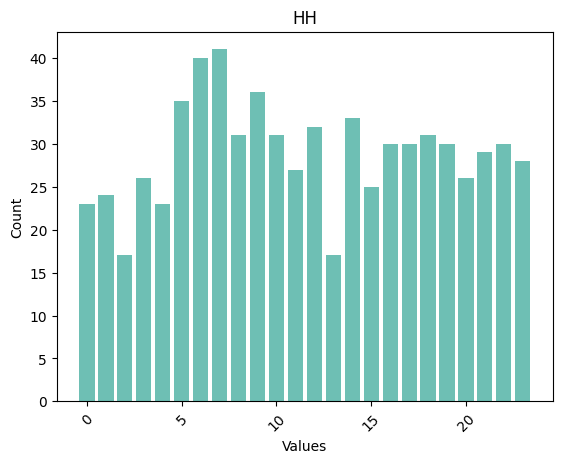

HH
7     41
6     40
9     36
5     35
14    33
12    32
8     31
18    31
10    31
16    30
19    30
17    30
22    30
21    29
23    28
11    27
3     26
20    26
15    25
1     24
4     23
0     23
2     17
13    17
Name: count, dtype: int64


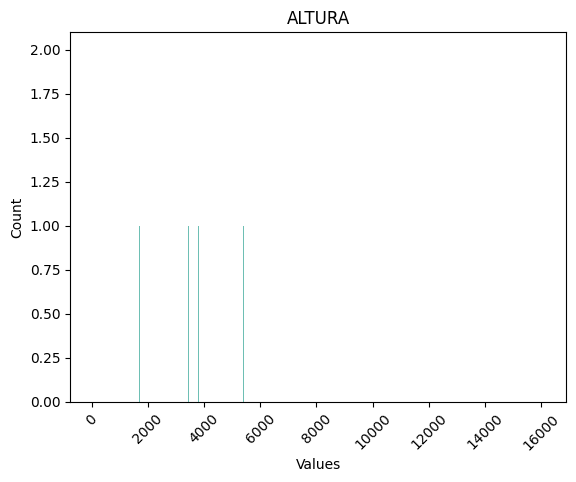

ALTURA
901     2
4300    2
365     2
1893    1
466     1
       ..
5750    1
2135    1
5400    1
2114    1
709     1
Name: count, Length: 126, dtype: int64


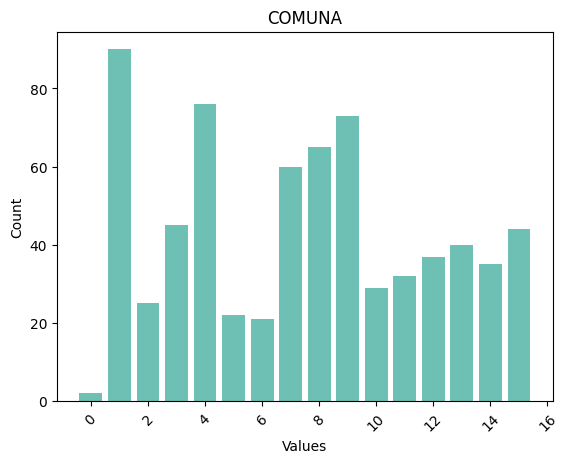

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64


In [53]:
# Assuming int_vars contains a list of integer variable names
for variable in int_vars['VARIABLE'].values:
    # Filter out rows where the variable is 'SD'
    filtered_df = df_hc[df_hc[variable] != 'SD']

    # Count the occurrences of each unique value in the variable
    value_counts = filtered_df[variable].value_counts()

    # Create a bar chart
    plt.bar(value_counts.index, value_counts.values, color='#31A594', alpha=0.7)
    plt.title(variable)
    plt.ylabel('Count')
    plt.xlabel('Values')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

    print(value_counts)
